# Tensorflow ja mnist

Epoch tarkoittaa ajanjaksoa, jolloin koko datasarja kulkee eteen- ja taaksepäin neuroverkon läpi vain kerran. Epoch kuvaa sitä, kuinka monta kertaa algoritmi käy läpi koko datan.

Batch-koko on koulutusesimerkkien kokonaismäärä yhdessä eteen- ja taaksepäin kulkevassa vaiheessa. Batch-koko ja erien (batchien) määrä ovat kaksi eri asiaa. Mitä suurempi batch-koko on, sitä enemmän tarvitset muistia. (https://www.linkedin.com/pulse/confusion-killer-epoch-vs-batch-size-iteration-sudip-kundu/)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Tuodaan ensin data

In [13]:
# Tuo mnist-data
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, x_test = X_train / 255.0, X_test / 255.0

## Katsotaan dataa

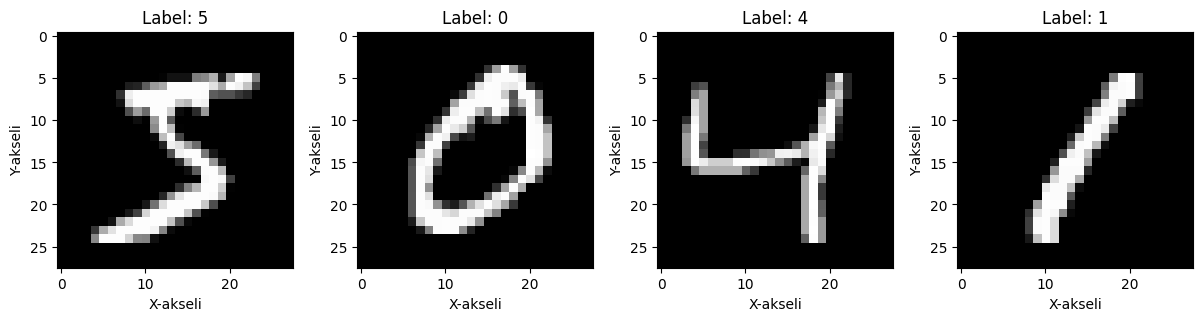

In [11]:
# Luodaan kuva ja akselit, jossa on 1 rivi ja 4 saraketta
fig, axs = plt.subplots(1, 4, figsize=(12, 3), layout="constrained")

# Loopataan akselien yli ja piirretään dataa
for i, ax in enumerate(axs):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.set_xlabel('X-akseli')
    ax.set_ylabel('Y-akseli')

plt.show()

## Kouluta perinteinen neuroverkko mnist-datalla

Malli: https://www.tensorflow.org

Muista tallentaa historia muuttujaan: history = model.fit( ... )

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
model.evaluate(X_test, y_test)

Epoch 1/5


c:\Users\emilh\OneDrive\Työpöytä\myDev\Projects\ai-ml-tehtava-1\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8627 - loss: 0.4796 - val_accuracy: 0.9545 - val_loss: 19.9671
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9554 - loss: 0.1546 - val_accuracy: 0.9662 - val_loss: 15.3902
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9681 - loss: 0.1064 - val_accuracy: 0.9730 - val_loss: 12.5141
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0885 - val_accuracy: 0.9776 - val_loss: 12.6778
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0741 - val_accuracy: 0.9790 - val_loss: 12.0289
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9750 - loss: 14.4519  


[12.028850555419922, 0.9789999723434448]

## Piirrä graafi, joss esitetään ann tarkkuuden kehitys (validointi ja koulutusdatalla) suhteessa epoch-numeroon.

```
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
```

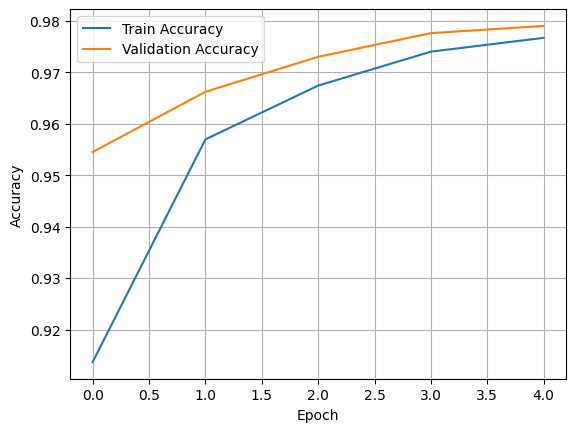

In [19]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Jaetaan koulutusdata edelleen koulutus- ja validointijoukkoihin (80% koulutukseen, 20% validointiin)

Validointijoukkoa käytetään mallin suorituskyvyn seurantaan koulutuksen aikana, mikä auttaa havaitsemaan ylisovittamisen.


https://medium.com/analytics-vidhya/training-neural-networks-for-dummies-04-pt-1-train-validate-test-split-9b1141496c63

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

## Muutetaan kuvat oikeaan muotoon (28x28 pikseliä, 1 kanava)

Alkuperäiset kuvat ovat muodossa (lukumäärä, 28, 28), eli ilman kanavaulottuvuutta. Konvoluutiokerrokset odottavat syötteeksi dataa muodossa (lukumäärä, korkeus, leveys, kanavien lukumäärä). Lisätään kanavaulottuvuus (1), koska kuvat ovat harmaasävyisiä (vain yksi kanava). Muotoilun jälkeen data on valmis syötettäväksi konvoluutioneuroverkkoon.

```
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
```

In [21]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

## Kouluta konvoluutionallinen neuroverkko mnist-datalla

Muista tallentaa historia muuttujaan: history = model.fit( ... )

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8534 - loss: 0.4670 - val_accuracy: 0.9810 - val_loss: 0.0623
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9738 - loss: 0.0883 - val_accuracy: 0.9878 - val_loss: 0.0413
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9830 - loss: 0.0561 - val_accuracy: 0.9878 - val_loss: 0.0369
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9838 - loss: 0.0520 - val_accuracy: 0.9900 - val_loss: 0.0348
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9882 - loss: 0.0406 - val_accuracy: 0.9908 - val_loss: 0.0315
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9910 - loss: 0.0304 - val_accuracy: 0.9913 - val_loss: 0.0299
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9922 - loss: 0.0262 - val_accuracy: 0.9907 - val_loss: 0.0331
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9928 - loss: 0.0

## Piirrä graafi, joss esitetään cnn tarkkuuden kehitys (validointi ja koulutusdatalla) suhteessa epoch-numeroon.

```
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
```

313/313 - 1s - 2ms/step - accuracy: 0.9834 - loss: 12.6071


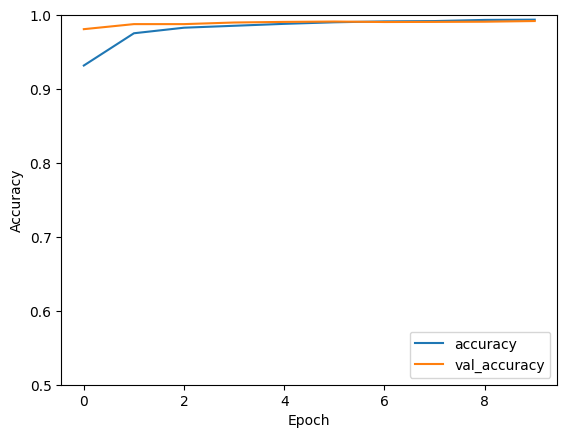

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

## Piirrä konvoluutionaalisen neuroverkon luokittelun tuloksista confusion matrix

Vaiheita:

 * Model predict
 * np.argmax(y_pred, axis=1) saat haettua ennusteistat suurimman todennäköisyyden saaneen (https://numpy.org/devdocs/reference/generated/numpy.argmax.html)
 * Saat confusion matrixin scikit-learn -kirjastosta
 * Seaborn heatmap

